## multi-class classification (使用sckit-learn)
       
       針對iris 品種分類('setosa' 'versicolor' 'virginica'), 進行logistic,pca,svm,knn,decision tree, random forest等演練



In [89]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('../../common')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions,testcase_report

## 載入Iris DataSet

In [90]:
iris = datasets.load_iris()
print(iris.DESCR)
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris['data'].shape)
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]  #only  select two featrues
iris_data.head(5)



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

## EDA (Exploratory Data Analysis)

In [91]:
x.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

### Standard deviation

In [92]:
np.std(x)

sepal length (cm)    0.825301
sepal width (cm)     0.434411
petal length (cm)    1.759404
petal width (cm)     0.759693
dtype: float64

### Variance

In [93]:
np.var(x)

sepal length (cm)    0.681122
sepal width (cm)     0.188713
petal length (cm)    3.095503
petal width (cm)     0.577133
dtype: float64

### Covaiance matrix


In [94]:
np.cov(x.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

### Coefficient Corelation
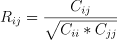

In [95]:
# covariance of c[1,0]
np.cov(x.T)[1,0]

-0.04243400447427293

In [96]:
# Coefficient Corelation of c[1,0]
np.cov(x.T)[1,0]/np.sqrt(np.var(x)[0]*np.var(x)[1])

-0.1183588430869149

In [97]:
iris_data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [98]:
np.corrcoef(iris_data.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113,  0.78256123],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593, -0.42665756],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543,  0.9490347 ],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ,  0.95654733],
       [ 0.78256123, -0.42665756,  0.9490347 ,  0.95654733,  1.        ]])

In [99]:
np.corrcoef(x.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [100]:
print(x.keys())
np.corrcoef(x.T)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

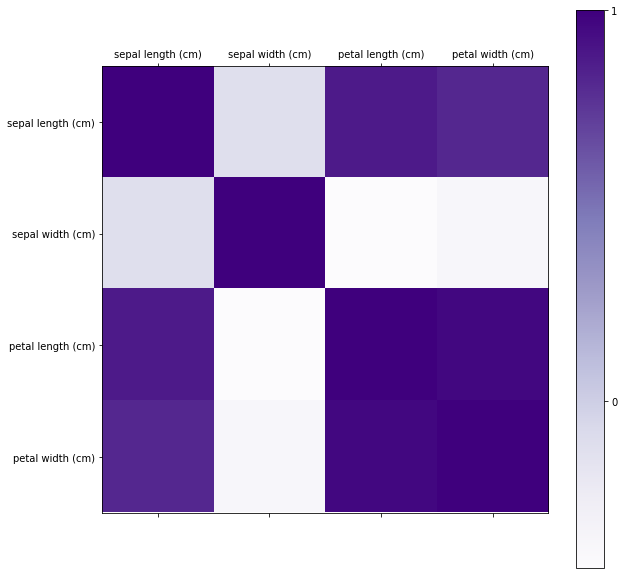

In [101]:
cov = np.corrcoef(x.T)
plt.figure(figsize=(10,10))
img = plt.matshow(cov,cmap=plt.cm.Purples,fignum=1)
plt.colorbar(img, ticks=[-1,0,1])
plt.xticks(np.arange(len(x.keys())), x.keys())
plt.yticks(np.arange(len(x.keys())), x.keys())
plt.show()


####  Iris-Setosa

In [102]:
setosa=iris_data[iris_data['target']==0]
setosa.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  target  
count         50.000000    50.0  
mean           0.246000     0.0  
std            0.105386     0.0  
min            0.100000     0.0  
25%            0.200000     0.0  
50%            0.200000     0.0  
75%            0.300000     0.0  
max            0.600000     0.0

####  Iris-Versicolor

In [103]:
versicolor=iris_data[iris_data['target']==1]
versicolor.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          50.000000         50.000000          50.000000   
mean            5.936000          2.770000           4.260000   
std             0.516171          0.313798           0.469911   
min             4.900000          2.000000           3.000000   
25%             5.600000          2.525000           4.000000   
50%             5.900000          2.800000           4.350000   
75%             6.300000          3.000000           4.600000   
max             7.000000          3.400000           5.100000   

       petal width (cm)  target  
count         50.000000    50.0  
mean           1.326000     1.0  
std            0.197753     0.0  
min            1.000000     1.0  
25%            1.200000     1.0  
50%            1.300000     1.0  
75%            1.500000     1.0  
max            1.800000     1.0

#### Iris-Virginica

In [104]:
virginica=iris_data[iris_data['target']==2]
virginica.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             6.58800          2.974000           5.552000   
std              0.63588          0.322497           0.551895   
min              4.90000          2.200000           4.500000   
25%              6.22500          2.800000           5.100000   
50%              6.50000          3.000000           5.550000   
75%              6.90000          3.175000           5.875000   
max              7.90000          3.800000           6.900000   

       petal width (cm)  target  
count          50.00000    50.0  
mean            2.02600     2.0  
std             0.27465     0.0  
min             1.40000     2.0  
25%             1.80000     2.0  
50%             2.00000     2.0  
75%             2.30000     2.0  
max             2.50000     2.0

In [105]:
iris_data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8               3.4                1.6               0.2   
12                 4.8               3.0                1.4               0.1   
13                 4.3               3.0                1.1               0.1   
14                 5.8               4.0                1.2               0.2   
15                 5.7               4.4                1.5               0.4   
16                 5.4               3.9                1.3               0.4   
17                 5.1               3.5                1.4               0.3   
18                 5.7               3.8                1.7               0.3   
19                 5.1               3.8                1.5               0.3   
20                 5.4               3.4                1.7               0.2   
21                 5.1               3.7                1.5               0.4   
22                 4.6               3.6                1.0               0.2   
23                 5.1               3.3                1.7               0.5   
24                 4.8               3.4                1.9               0.2   
25                 5.0               3.0                1.6               0.2   
26                 5.0               3.4                1.6               0.4   
27                 5.2               3.5                1.5               0.2   
28                 5.2               3.4                1.4               0.2   
29                 4.7               3.2                1.6               0.2   
..                 ...               ...                ...               ...   
120                6.9               3.2                5.7               2.3   
121                5.6               2.8                4.9               2.0   
122                7.7               2.8                6.7               2.0   
123                6.3               2.7                4.9               1.8   
124                6.7               3.3                5.7               2.1   
125                7.2               3.2                6.0               1.8   
126                6.2               2.8                4.8               1.8   
127                6.1               3.0                4.9               1.8   
128                6.4               2.8                5.6               2.1   
129                7.2               3.0                5.8               1.6   
130                7.4               2.8                6.1               1.9   
131                7.9               3.8                6.4               2.0   
132                6.4               2.8                5.6               2.2   
133                6.3               2.8                5.1               1.5   
134                6.1               2.6                5.6               1.4   
135                7.7               3.0                6.1               2.3   
136                6.3               3.4                5.6               2.4   
137                6.4              

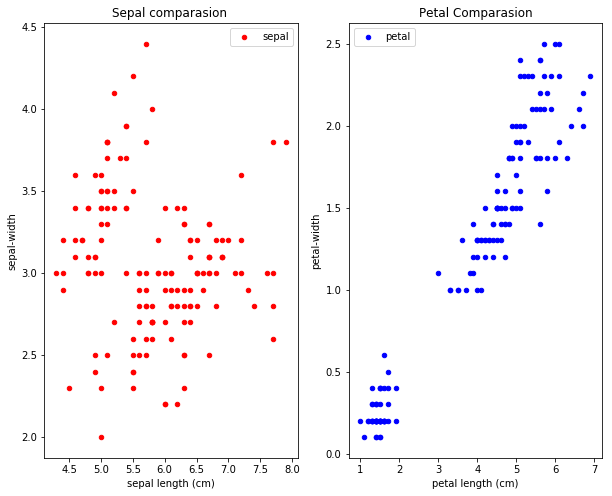

In [106]:
fig,ax=plt.subplots(1,2,figsize=(10, 8))
#corelation  -0.11756978
iris_data.plot(x="sepal length (cm)",y="sepal width (cm)",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
#corelation  0.96286543
iris_data.plot(x="petal length (cm)",y="petal width (cm)",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
plt.show()

<Figure size 432x288 with 0 Axes>

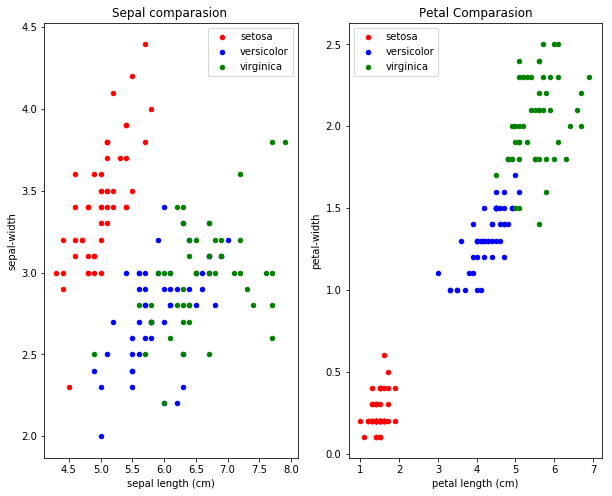

In [107]:
#for each Species ,let's check what is petal and sepal distibutuon
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(10, 8))

setosa.plot(x="sepal length (cm)",y="sepal width (cm)", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="sepal length (cm)",y="sepal width (cm)",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="sepal length (cm)",y="sepal width (cm)", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="petal length (cm)",y="petal width (cm)", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="petal length (cm)",y="petal width (cm)",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="petal length (cm)",y="petal width (cm)", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
plt.show()

In [108]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 拿 sepal lenght,width 最糟! 

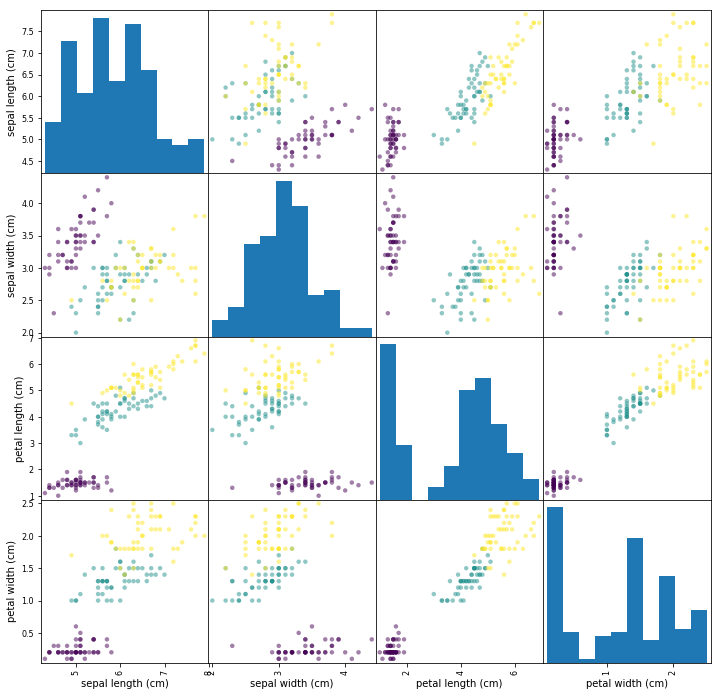

In [109]:
import pandas as pd
from pandas.plotting import scatter_matrix
scatter_matrix(x,c=iris.target, figsize=(12, 12),s=80)
plt.show()

## 切割資料集 (training set, test set)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3, random_state=0)

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [112]:
X_test.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2

## Standardization

In [113]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [114]:
X_train_std[:5]

array([[-1.02366372, -2.37846268, -0.18295039, -0.29318114],
       [ 0.69517462, -0.10190314,  0.93066067,  0.7372463 ],
       [ 0.92435306,  0.58106472,  1.04202177,  1.63887031],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35083601],
       [ 0.92435306, -1.24018291,  1.09770233,  0.7372463 ]])

## Create LogisticRegression Classifier  (using X_train_std)

In [115]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto')
lr.fit(X_train_std,y_train)
lr.predict(X_test_std)


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [116]:
print(lr.coef_)

[[-0.98719189  1.01944643 -1.74832086 -1.64072949]
 [ 0.54456962 -0.35746202 -0.26679194 -0.68663194]
 [ 0.44262227 -0.66198441  2.01511281  2.32736143]]


In [117]:
print(y_test.values)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [118]:
error=np.where(lr.predict(X_test_std)!=y_test)[0]
print('misclassified:',error)
print('score:',1-len(error)/len(X_test_std))

misclassified: [37]
score: 0.9777777777777777


In [119]:
lr.score(X_test_std, y_test)

0.9777777777777777

### 使用testcase_report() 回報分類結果

In [120]:
report=testcase_report(iris_data,lr,X_test,X_test_std,y_test)

accuracy: 0.9777777777777777
error_index : [37]
number of errors :1/45
error data index: Int64Index([83], dtype='int64')


In [121]:
report[0]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
83                6.0               2.7                5.1               1.6   

    target  pred  
83       1     2

In [122]:
report[1].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
114                5.8               2.8                5.1               2.4   
62                 6.0               2.2                4.0               1.0   
33                 5.5               4.2                1.4               0.2   
107                7.3               2.9                6.3               1.8   
7                  5.0               3.4                1.5               0.2   

     target  pred  
114       2     2  
62        1     1  
33        0     0  
107       2     2  
7         0     0

In [123]:
X_test.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2

# 主成分分析PCA

###   fit_transform() v.s. transform()
    根據對之前部分trainData進行fit的整體指標，對剩餘的資料（testData）使用同樣的均值、方差、最大最小值等指標進行轉換transform(testData)，從而保證train、test處理方式相同。

In [124]:
X_train_std[:5]

array([[-1.02366372, -2.37846268, -0.18295039, -0.29318114],
       [ 0.69517462, -0.10190314,  0.93066067,  0.7372463 ],
       [ 0.92435306,  0.58106472,  1.04202177,  1.63887031],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35083601],
       [ 0.92435306, -1.24018291,  1.09770233,  0.7372463 ]])

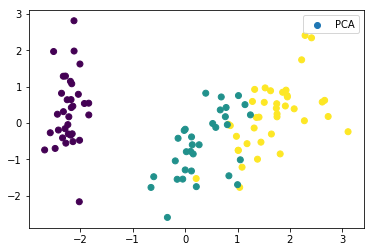

In [164]:
from sklearn.decomposition import PCA
# 主成分分析PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= y_train, label="PCA")
plt.legend()
plt.show()

In [165]:
pca.explained_variance_

array([2.8998938 , 0.98708902])

In [166]:
pca.explained_variance_ratio_

array([0.71806894, 0.24442204])

In [167]:
pca.explained_variance_ratio_.cumsum()

array([0.71806894, 0.96249098])

In [168]:
print(X_train_pca.shape)
print(y_train.shape)

(105, 2)
(105,)


## Create LogisticRegression Classifier (using X_train_pca)

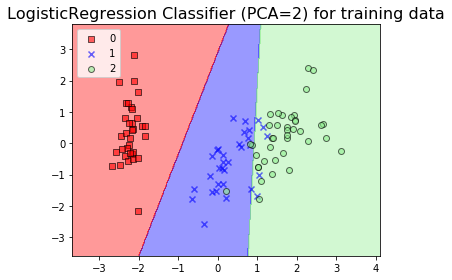

0.8666666666666667

In [127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto')
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train, classifier=lr)
plt.title('LogisticRegression Classifier (PCA=2) for training data',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
lr.score(X_test_pca, y_test)


In [128]:
report=testcase_report(iris_data,lr,X_test,X_test_pca,y_test)
report[0]

accuracy: 0.8666666666666667
error_index : [ 7  8 13 20 33 37]
number of errors :6/45
error data index: Int64Index([86, 76, 54, 121, 127, 83], dtype='int64')


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
86                 6.7               3.1                4.7               1.5   
76                 6.8               2.8                4.8               1.4   
54                 6.5               2.8                4.6               1.5   
121                5.6               2.8                4.9               2.0   
127                6.1               3.0                4.9               1.8   
83                 6.0               2.7                5.1               1.6   

     target  pred  
86        1     2  
76        1     2  
54        1     2  
121       2     1  
127       2     1  
83        1     2

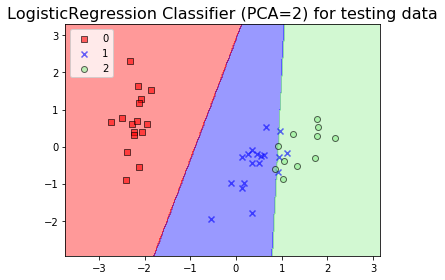

In [129]:
plot_decision_regions(X_test_pca,y_test, classifier=lr)
plt.title('LogisticRegression Classifier (PCA=2) for testing data',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Create KNN Classifier

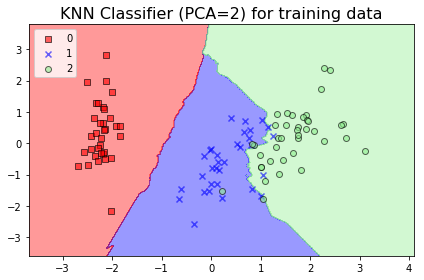

0.9428571428571428
0.9111111111111111


In [133]:
from sklearn import neighbors, datasets
knn = neighbors.KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=knn)
plt.title('KNN Classifier (PCA=2) for training data',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(knn.score(X_train_pca, y_train))
print(knn.score(X_test_pca, y_test))

In [134]:
report=testcase_report(iris_data,knn,X_test,X_test_pca,y_test)
report[0]

accuracy: 0.9111111111111111
error_index : [ 8 13 33 37]
number of errors :4/45
error data index: Int64Index([76, 54, 127, 83], dtype='int64')


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
76                 6.8               2.8                4.8               1.4   
54                 6.5               2.8                4.6               1.5   
127                6.1               3.0                4.9               1.8   
83                 6.0               2.7                5.1               1.6   

     target  pred  
76        1     2  
54        1     2  
127       2     1  
83        1     2

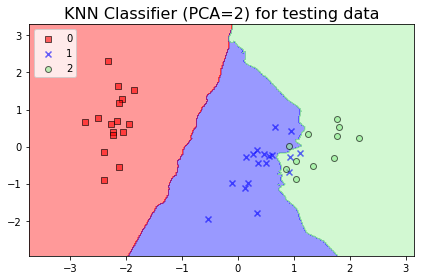

In [135]:
plot_decision_regions(X_test_pca,y_test, classifier=knn)
plt.title('KNN Classifier (PCA=2) for testing data',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Create SVM  Classifier 

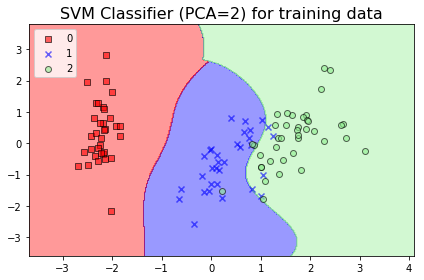

0.9111111111111111

In [136]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf',gamma='auto')
svm.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=svm)
plt.title('SVM Classifier (PCA=2) for training data',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

svm.score(X_test_pca, y_test)

In [137]:
report=testcase_report(iris_data,svm,X_test,X_test_pca,y_test)
report[0]

accuracy: 0.9111111111111111
error_index : [ 8 13 33 37]
number of errors :4/45
error data index: Int64Index([76, 54, 127, 83], dtype='int64')


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
76                 6.8               2.8                4.8               1.4   
54                 6.5               2.8                4.6               1.5   
127                6.1               3.0                4.9               1.8   
83                 6.0               2.7                5.1               1.6   

     target  pred  
76        1     2  
54        1     2  
127       2     1  
83        1     2

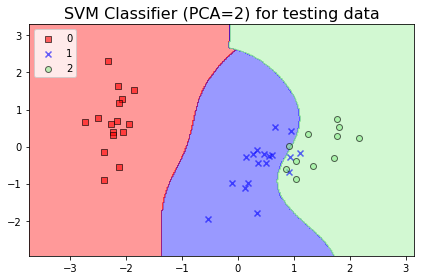

In [138]:
plot_decision_regions(X_test_pca,y_test, classifier=svm)
plt.title('SVM Classifier (PCA=2) for testing data',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Create DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=0)
clf.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=clf)
plt.title('Decision Tree Classifier (PCA=2) for training data',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

clf.score(X_test_pca, y_test)

In [ ]:
report=testcase_report(iris_data,clf,X_test,X_test_pca,y_test)
report[0]

In [ ]:
plot_decision_regions(X_test_pca,y_test, classifier=clf)
plt.title('Decision Tree Classifier (PCA=2) for testing data',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Create Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=100,random_state=3,n_jobs=8)
forest.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=forest)
plt.title('Random Forest Classifier (PCA=2) for training data',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

forest.score(X_test_pca, y_test)

In [ ]:
report=testcase_report(iris_data,forest,X_test,X_test_pca,y_test)
report[0]

In [ ]:
plot_decision_regions(X_test_pca,y_test, classifier=forest)
plt.title('Random Forest Classifier (PCA=2) for testing data',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

